In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('./Unemployment_Rate.csv')
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [4]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

We will rename the columns for our convenience

In [5]:
data.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate","Estimated Employed",
               "Estimated Labour Participation Rate","Region",
               "longitude","latitude"]


# Data Cleaning

### 1. Checking null values

In [6]:
data.isnull().sum()

States                                 0
Date                                   0
Frequency                              0
Estimated Unemployment Rate            0
Estimated Employed                     0
Estimated Labour Participation Rate    0
Region                                 0
longitude                              0
latitude                               0
dtype: int64

We see that there are no null values 

### 2. Checking data type

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               267 non-null    object 
 1   Date                                 267 non-null    object 
 2   Frequency                            267 non-null    object 
 3   Estimated Unemployment Rate          267 non-null    float64
 4   Estimated Employed                   267 non-null    int64  
 5   Estimated Labour Participation Rate  267 non-null    float64
 6   Region                               267 non-null    object 
 7   longitude                            267 non-null    float64
 8   latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [8]:
type(data.iloc[2,1])

str

The 'Date' column is in String format, we will be converting it into datetime object for more functionality

In [9]:
data['Date']=pd.to_datetime(data['Date'])

In [10]:
data.describe()

,Date,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,longitude,latitude
count,267,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,2020-06-16 09:15:30.337078528,12.236929,1.396211e+07,41.681573,22.826048,80.532425
min,2020-01-31 00:00:00,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,2020-03-31 00:00:00,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,2020-06-30 00:00:00,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,2020-08-31 00:00:00,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,2020-10-31 00:00:00,75.850000,5.943376e+07,69.690000,33.778200,92.937600
std,NaN,10.803283,1.336632e+07,7.845419,6.270731,5.831738


# Exploratory Data Analysis

In [11]:
data.States.unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

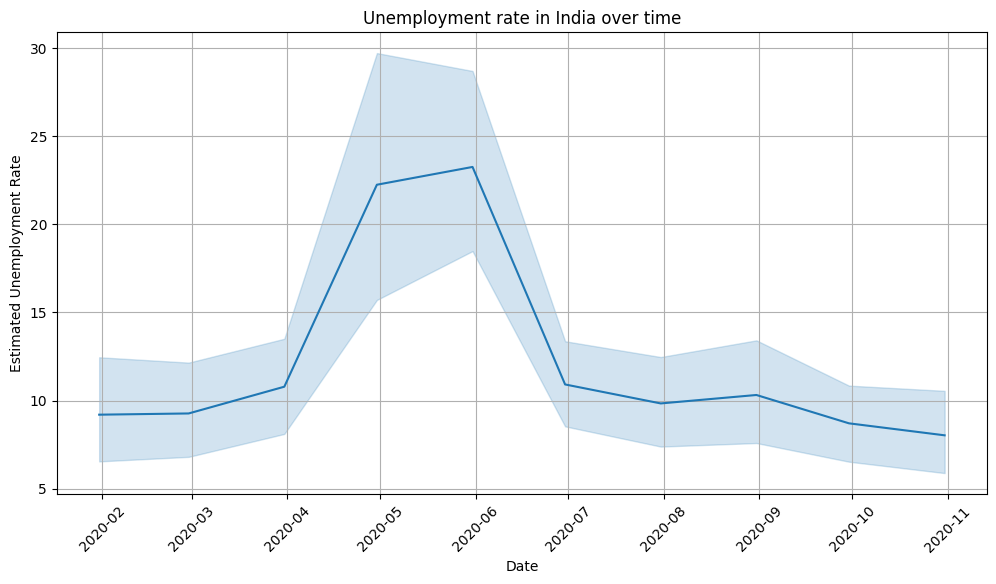

In [12]:
plt.figure(figsize=(12,6)) #unemployment rate over time
sns.lineplot(x=data.Date,y=data['Estimated Unemployment Rate'])
plt.title("Unemployment rate in India over time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

- The first lockdown was issued at 25th march 2020 in India
- We see that unemployment rate had started to increase around that time
- By the start of April the unemployment rate had increased significantly

- The time period between May and June faced the highest unemployment rate
- By June unemployment rate started to fall down and reached the normal unemployment rate by August

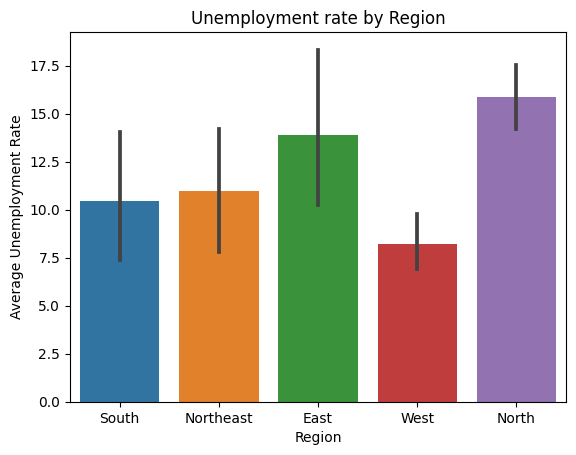

In [13]:
sns.barplot(data,x='Region',y='Estimated Unemployment Rate')
plt.xlabel("Region")
plt.ylabel('Average Unemployment Rate')
plt.title('Unemployment rate by Region')
plt.show()

In [14]:
data.groupby('Region')['Estimated Unemployment Rate'].mean().sort_values(ascending=False)

Region
North        15.889620
East         13.916000
Northeast    10.950263
South        10.454667
West          8.239000
Name: Estimated Unemployment Rate, dtype: float64

- We can see that North region has the highest unemployment rate and West region has the lowest unemployment rate

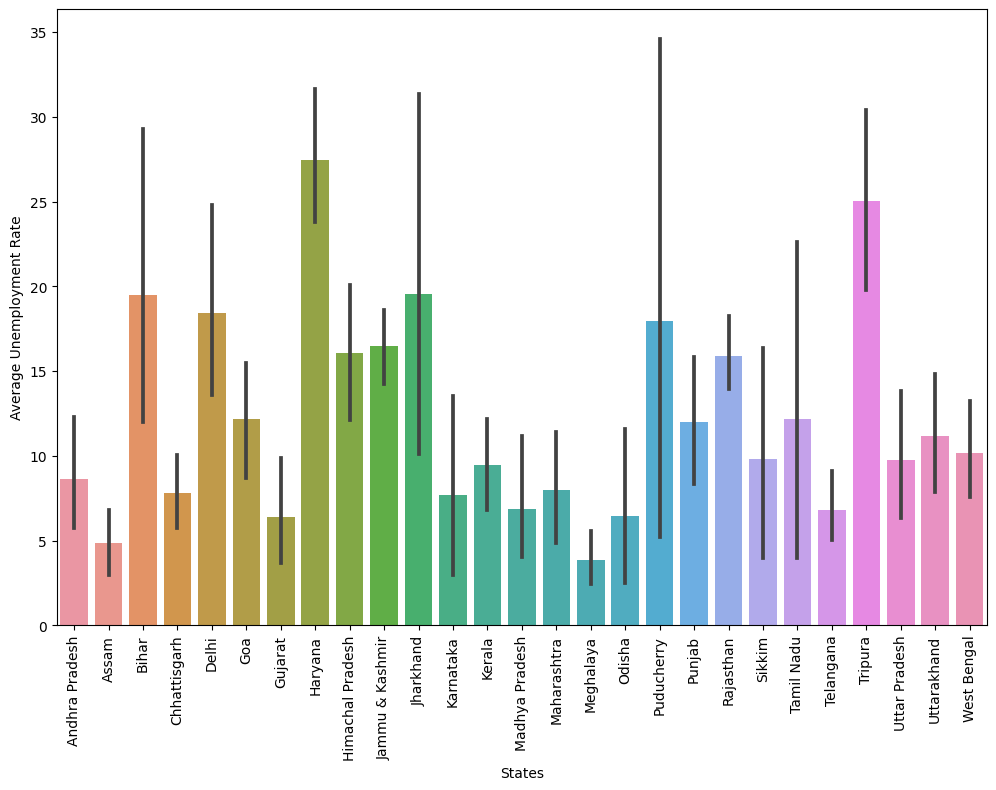

In [15]:
plt.figure(figsize=(12,8))  #unemployment by State wise
sns.barplot(data,x='States',y='Estimated Unemployment Rate')
plt.ylabel('Average Unemployment Rate')
plt.xticks(rotation=90)
plt.show()

- We see that Haryana and Tripura have the highest unemployment rate while Meghalaya and Assam have the lowest unemployment rate 

In [16]:
for region in list(data['Region'].unique()):  #Highest unemployed state in each region
    df=data[data['Region']==region]
    rate_by_states=df.groupby('States')['Estimated Unemployment Rate'].mean().sort_values(ascending=False)
    print(f'-> {rate_by_states.index[0]} has the highest unemployment rate of {rate_by_states[0]}% in {region} region.\n')

-> Puducherry has the highest unemployment rate of 17.942% in South region.

-> Tripura has the highest unemployment rate of 25.055% in Northeast region.

-> Jharkhand has the highest unemployment rate of 19.538999999999998% in East region.

-> Goa has the highest unemployment rate of 12.167% in West region.

-> Haryana has the highest unemployment rate of 27.476999999999997% in North region.



<Axes: xlabel='Date', ylabel='Estimated Unemployment Rate'>

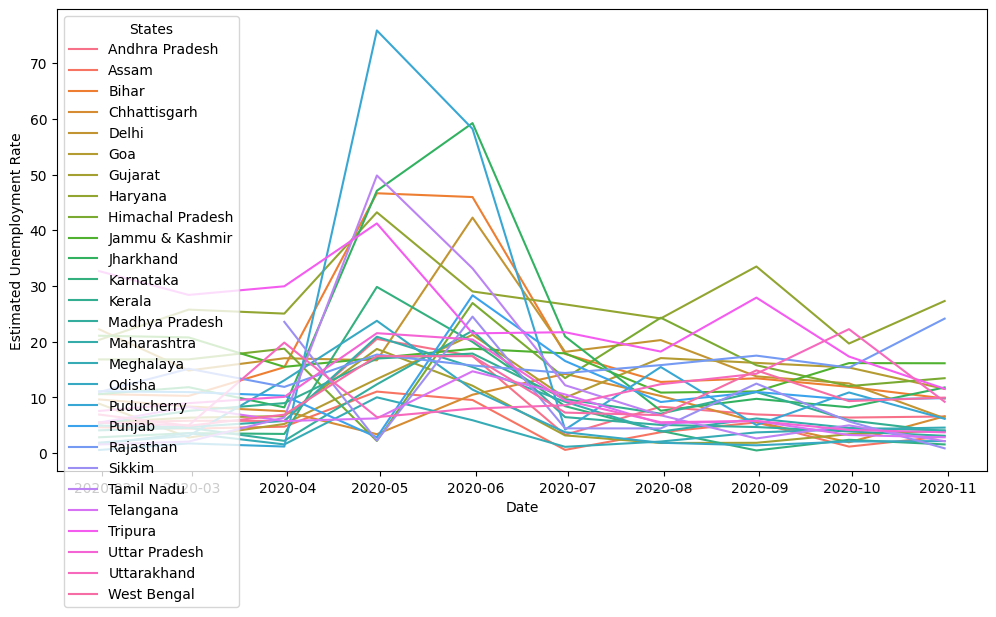

In [17]:
plt.figure(figsize=(12,6))
sns.lineplot(data,x='Date',y='Estimated Unemployment Rate', hue='States')